In [1]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/74.6 kB ? eta -:--:--
   -------------------------------- ------- 61.4/74.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 74.6/74.6 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
   ---------------------------------------- 82.1/82.1 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------------------------------------- 116.3/116.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
   ---------------------------------------- 134.8/134.8 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.8 kB ? eta -:--:--
   ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00


In [3]:
!pip install emd

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/85.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.3 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.3 kB 262.6 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.3 kB 281.8 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/85.3 kB 292.6 kB/

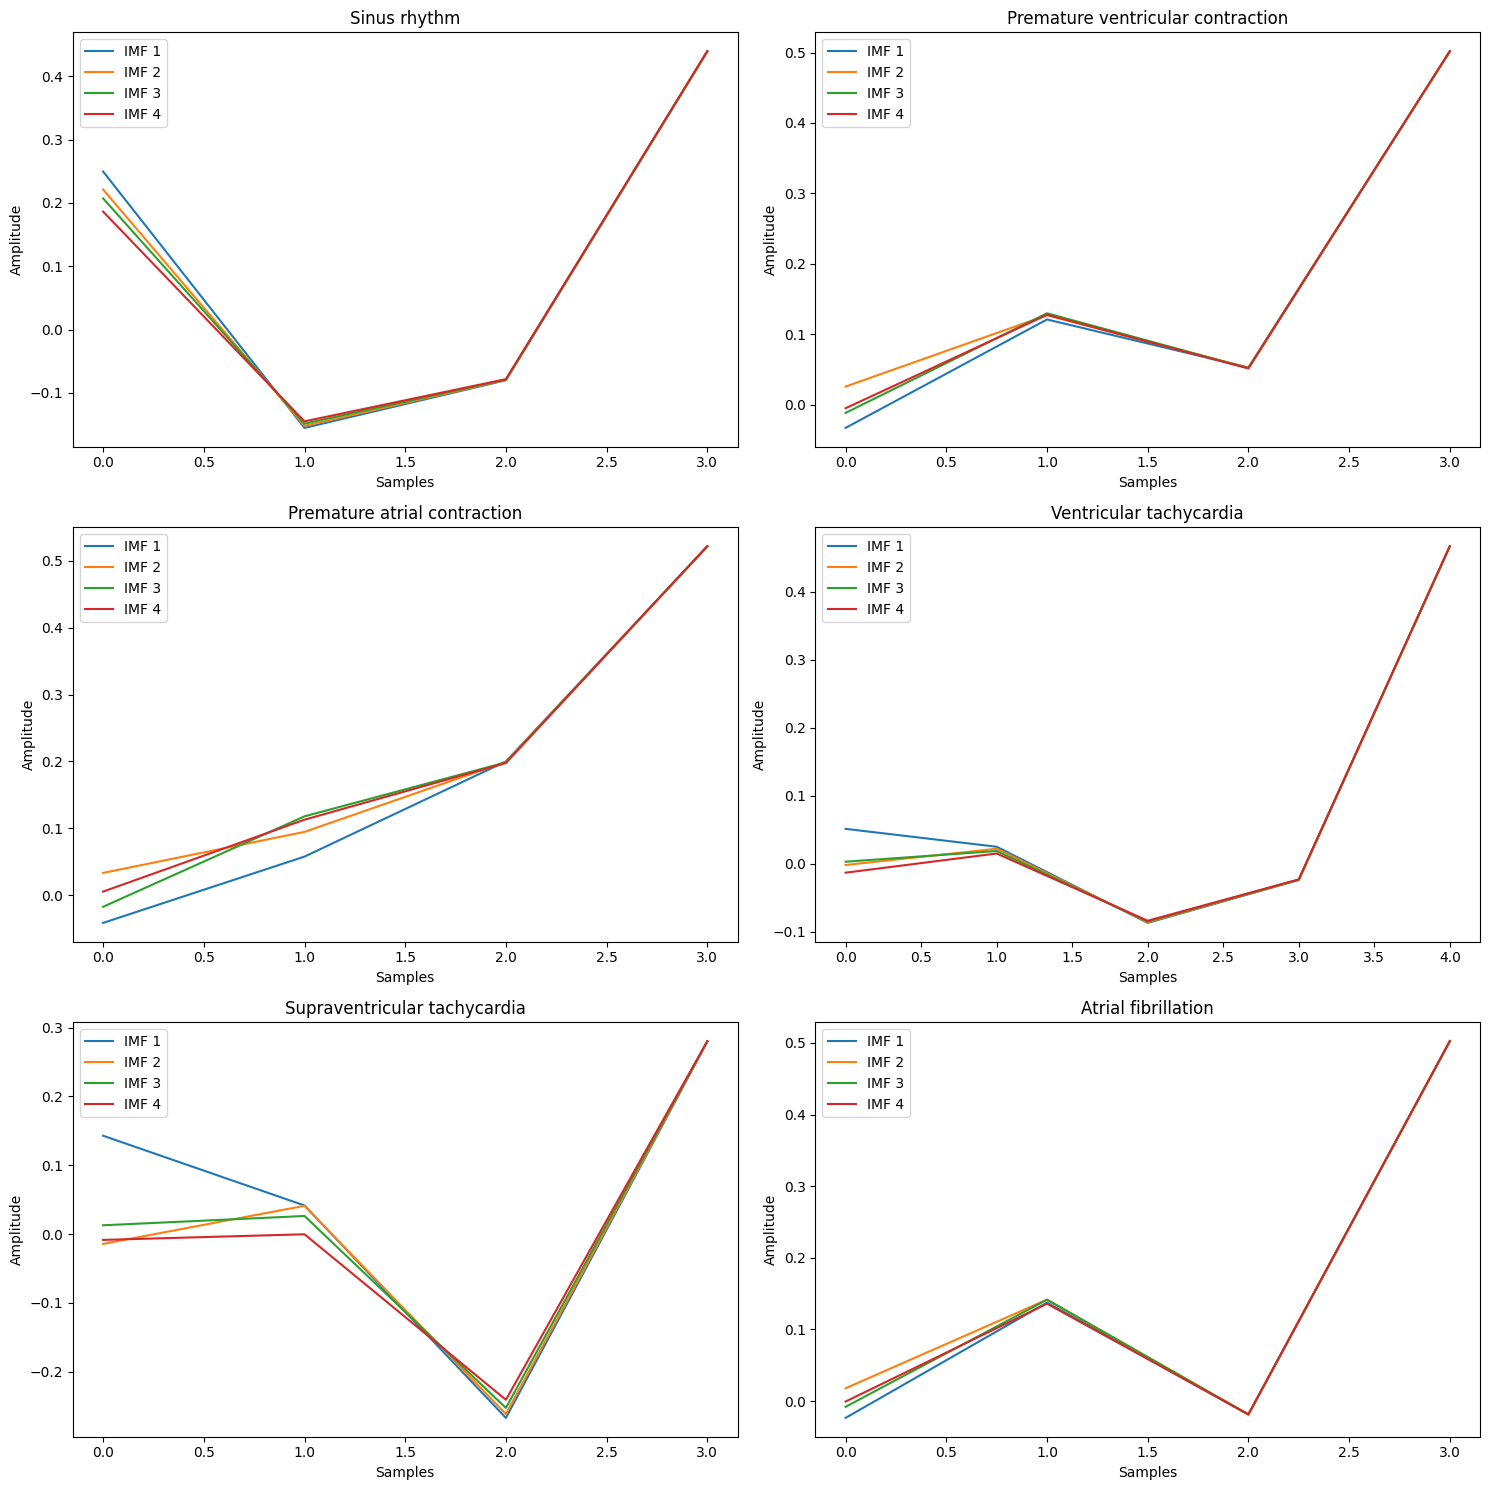

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import emd
 
data = loadmat('D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset\\MPA_181220181216.mat')
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}
ppgseg = data['ppgseg']
labels = data['labels'].flatten()

unique_labels, counts = np.unique(labels, return_counts=True)
 
num_classes = len(unique_labels)
rows = (num_classes + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, (label, count) in enumerate(zip(unique_labels, counts)): 
 
    imfs = emd.sift.sift(ppg_subset)
 
    num_imfs = min(len(imfs), 4)
    for j in range(num_imfs):
        ax = axes[i // cols, i % cols]
        ax.plot(imfs[j], label=f'IMF {j+1}')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')
        ax.set_title(label_map.get(label, f"Label: {label}"))
        ax.legend()
 
for i in range(num_classes, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()
